<a href="https://colab.research.google.com/github/fernandoGitHub/ML_Projects/blob/main/UNDP_Demographics_Data/UNDP_Demographics_Data_Analysis-Part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNDP Demographics Data Analysis
In this notebook we will explore the database per particular year and see if there is any underlying pattern or structure within.
For that, we will create example vectors for each country based on 2019 data and apply different clusterization and hyperparameter tuning mechanisms

# Setup

In [1]:
!wget https://raw.githubusercontent.com/fernandoGitHub/MLOPS_GSD/main/MLOP_setup.py
import MLOP_setup

MLOP_setup.install_package('WGET')

--2022-05-21 14:02:00--  https://raw.githubusercontent.com/fernandoGitHub/MLOPS_GSD/main/MLOP_setup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176 (2.1K) [text/plain]
Saving to: ‘MLOP_setup.py’

MLOP_setup.py       100%[===================>]   2.12K  --.-KB/s    in 0s      

2022-05-21 14:02:01 (44.3 MB/s) - ‘MLOP_setup.py’ saved [2176/2176]

Installing wget ...
Package wget has been successfully installed
Reloading Packages


In [2]:
import os
import shutil
import wget

import numpy as np
import pandas as pd

import pprint
pp = pprint.PrettyPrinter()

In [99]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Preparation

In [22]:
_RAW_DATA_DIR = './raw_data/'
_ZIP_FILENAME = 'UNDP-Processed.zip'
_UTILS_FILENAME = 'UNDP_utils.py'
_DATA_REP_URL = 'https://github.com/fernandoGitHub/ML_Projects/raw/main/UNDP_Demographics_Data/data/'
_UTILS_REP_URL = 'https://github.com/fernandoGitHub/ML_Projects/raw/main/UNDP_Demographics_Data/'

_ZIP_FULL_PATH = os.path.join(_RAW_DATA_DIR, _ZIP_FILENAME)
_ZIP_URL_PATH = os.path.join(_DATA_REP_URL, _ZIP_FILENAME)
_UTILS_URL_PATH = os.path.join(_UTILS_REP_URL, _UTILS_FILENAME)
_UTILS_FULL_PATH = os.path.join('.', _UTILS_FILENAME)

if os.path.isdir('./sample_data'):
  shutil.rmtree('./sample_data')

if not os.path.isdir(_RAW_DATA_DIR):
  os.makedirs(_RAW_DATA_DIR)

if not os.path.isfile(_UTILS_FULL_PATH):
  file_name = wget.download(_UTILS_URL_PATH)
  print(f"Fetching from GitHub: {file_name} ...")

if not os.path.isfile(_ZIP_FULL_PATH):
  file_name = wget.download(_ZIP_URL_PATH)
  print(f"Fetching from GitHub: {file_name} ...")
  os.replace(os.path.join('.', _ZIP_FILENAME), _ZIP_FULL_PATH)

Fetching from GitHub: UNDP_utils.py ...
Fetching from GitHub: UNDP-Processed.zip ...


In [23]:
import UNDP_utils

In [19]:
_PROCESSED_DATA_DIR = './processed_data'
if not os.path.isdir(_PROCESSED_DATA_DIR):
  os.makedirs(_PROCESSED_DATA_DIR)

In [21]:
# Helper function to clean the raw_data directory
#shutil.rmtree('./raw_data')

In [24]:
from zipfile import ZipFile

with ZipFile(_ZIP_FULL_PATH, 'r') as zip:
  # printing all the contents of the zip file
  zip.printdir()

  # extracting all the files
  zip.extractall(_RAW_DATA_DIR)

File Name                                             Modified             Size
Old_age_dependency_ratio.csv                   2022-05-18 11:49:08        14220
Young_age_dependency_ratio.csv                 2022-05-18 11:49:08        15755
Urban_Population.csv                           2022-05-18 11:49:10        16101
UNDP_Demographics_Data.csv                     2022-05-18 11:49:10       103713
y_pop_2030.csv                                 2022-05-18 11:49:10         3219
Population_ages_15_64.csv                      2022-05-18 11:49:10        14084
Median_age.csv                                 2022-05-18 11:49:10        15727
Population_under_age_5.csv                     2022-05-18 11:49:10        13242
Total_Population.csv                           2022-05-18 11:49:10        15556
Population _ages_65 _and _older.csv            2022-05-18 11:49:10        13202


# Dataset Preparation

First, let's review the columnns at each dataset

**Finding:** We can see some irregularities:
   1.- Median and Sex Ratio have less columns (every 5 years)
   2.- Total population has an estimation for 2030

In [25]:
csv_file_list, csv_full_path_list = UNDP_utils.generate_file_list_from_dir(path=_RAW_DATA_DIR, filter = '.csv', display=True)

['Urban_Population.csv', 'Total_Population.csv', 'Young_age_dependency_ratio.csv', 'UNDP_Demographics_Data.csv', 'Median_age.csv', 'Population_ages_15_64.csv', 'Old_age_dependency_ratio.csv', 'Population_under_age_5.csv', 'y_pop_2030.csv', 'Population _ages_65 _and _older.csv']


**Next Tasks**
1.   Load the entire dataset in UNDP_Demographics_Data.csv to a raw dataframe
2.   Extract the statistics of 2019 in a new dataframe
3.   Transform the dataframe to percentage values to make it more useful
4.   Review dataframe info and save to file






In [30]:
# 1. Load the entire dataset in UNDP_Demographics_Data.csv to a raw dataframe
_raw_data_file = os.path.join(_RAW_DATA_DIR, 'UNDP_Demographics_Data.csv')

df_raw = pd.read_csv(_raw_data_file)

In [31]:
df_raw.head()

,Country,1990-Old_age_dependency_ratio,1995-Old_age_dependency_ratio,2000-Old_age_dependency_ratio,2005-Old_age_dependency_ratio,2010-Old_age_dependency_ratio,2011-Old_age_dependency_ratio,2012-Old_age_dependency_ratio,2013-Old_age_dependency_ratio,2014-Old_age_dependency_ratio,...,2010-Population _ages_65 _and _older,2011-Population _ages_65 _and _older,2012-Population _ages_65 _and _older,2013-Population _ages_65 _and _older,2014-Population _ages_65 _and _older,2015-Population _ages_65 _and _older,2016-Population _ages_65 _and _older,2017-Population _ages_65 _and _older,2018-Population _ages_65 _and _older,2019-Population _ages_65 _and _older
0,Afghanistan,4.5,4.8,4.7,4.5,4.7,4.7,4.7,4.7,4.7,...,0.7,0.7,0.7,0.8,0.8,0.9,0.9,0.9,1.0,1.0
1,Albania,8.9,10.6,11.3,13.1,15.9,16.3,16.7,17.2,17.8,...,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4
2,Algeria,6.3,6.4,7.0,7.5,8.1,8.2,8.3,8.5,8.7,...,2.0,2.0,2.1,2.1,2.2,2.3,2.4,2.6,2.7,2.8
3,Angola,4.9,5.1,5.1,5.0,4.7,4.6,4.6,4.6,4.6,...,0.6,0.6,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.7
4,Antigua and Barbuda,13.0,11.6,10.2,10.5,10.8,10.9,11.1,11.3,11.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
def slice_data_frame_by_year(df, year):
  df_year = df
  df_year = df_year.set_index('Country')
  for col in df_year.columns:
    if not(year in col):
      df_year = df_year.drop(col, axis=1)

  return df_year

In [91]:
# 2. Extract the statistics of 2019 in a new dataframe and save a copy
df_2019 = slice_data_frame_by_year(df_raw, '2019')

In [92]:
df_2019.head()

,2019-Old_age_dependency_ratio,2019-Young_age_dependency_ratio,2019-Urban_Population,2019-Population_ages_15_64,2019-Median_age,2019-Population_under_age_5,2019-Total_Population,2019-Population _ages_65 _and _older
Country,,,,,,,,
Afghanistan,4.8,77.3,25.8,20.9,18.2,5.6,38.0,1.0
Albania,20.8,25.4,61.2,2.0,36.1,0.2,2.9,0.4
Algeria,10.4,48.6,73.2,27.1,28.3,5.0,43.1,2.8
Angola,4.3,91.1,66.2,16.3,16.6,5.7,31.8,0.7
Antigua and Barbuda,13.1,31.8,24.5,0.1,33.7,0.0,0.1,0.0


In [93]:
def transform_dataframe(df):

  df['Population'] = df['2019-Total_Population']
  df['Pop <=5'] = np.round(df['2019-Population_under_age_5'] / df['2019-Total_Population'], 2)
  df['Pop >15 <=64'] = np.round(df['2019-Population_ages_15_64'] / df['2019-Total_Population'], 2)
  df['Pop >65'] = np.round(df['2019-Population _ages_65 _and _older'] / df['2019-Total_Population'], 2)
  df['Pop >5 <=14'] = np.round(1 - (df['Pop <=5'] + df['Pop >15 <=64'] + df['Pop >65']), 2)

  df['Dep <=5'] = df['2019-Young_age_dependency_ratio']
  df['Dep >65'] = df['2019-Old_age_dependency_ratio']

  df['Urban'] = np.round(df['2019-Urban_Population'] / df['2019-Total_Population'], 2)
  df['Median'] = df['2019-Median_age']

  tf_columns = ['Population', 'Pop <=5', 'Pop >5 <=14', 'Pop >15 <=64', 'Pop >65', 'Dep <=5', 'Dep >65', 'Urban', 'Median']
  df_tf = pd.DataFrame(index=df.index, columns=tf_columns, data=df[tf_columns])

  # Cleaning the resulting df
  df_tf = df_tf.dropna()
  df_tf = df_tf[df_tf['Population'] > 0]

  return df_tf 

In [94]:
# 3. Transform the dataframe to percentage values to make it more useful
df_2019 = transform_dataframe(df_2019)

In [100]:
# 4. Review dataframe info and save to file
df_2019.info()
df_2019.head()
df_2019.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
Index: 189 entries,  Afghanistan to  Marshall Islands
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    189 non-null    float64
 1   Pop <=5       189 non-null    float64
 2   Pop >5 <=14   189 non-null    float64
 3   Pop >15 <=64  189 non-null    float64
 4   Pop >65       189 non-null    float64
 5   Dep <=5       189 non-null    float64
 6   Dep >65       189 non-null    float64
 7   Urban         189 non-null    float64
 8   Median        189 non-null    float64
dtypes: float64(9)
memory usage: 14.8+ KB


,Population,Pop <=5,Pop >5 <=14,Pop >15 <=64,Pop >65,Dep <=5,Dep >65,Urban,Median
Country,,,,,,,,,
Afghanistan,38.0,0.15,0.27,0.55,0.03,77.3,4.8,0.68,18.2
Albania,2.9,0.07,0.10,0.69,0.14,25.4,20.8,21.10,36.1
Algeria,43.1,0.12,0.19,0.63,0.06,48.6,10.4,1.70,28.3
Angola,31.8,0.18,0.29,0.51,0.02,91.1,4.3,2.08,16.6
Antigua and Barbuda,0.1,0.00,0.00,1.00,0.00,31.8,13.1,245.00,33.7


,count,mean,std,min,25%,50%,75%,max
Population,189.0,40.641799,148.634253,0.10,2.30,9.30,29.20,1433.8
Pop <=5,189.0,0.870106,5.326996,0.00,0.05,0.09,0.14,37.0
Pop >5 <=14,189.0,-7.125820,49.814041,-345.00,0.11,0.17,0.25,0.5
Pop >15 <=64,189.0,6.369630,39.015492,0.48,0.60,0.65,0.67,271.0
Pop >65,189.0,0.886085,5.472320,0.00,0.03,0.06,0.15,38.0
Dep <=5,189.0,45.555026,21.429308,16.00,26.70,41.00,62.70,104.8
Dep >65,189.0,13.679365,9.624959,1.40,6.00,10.10,20.40,47.1
Urban,189.0,50.156614,131.076761,0.03,1.61,7.38,23.81,880.0
Median,189.0,29.800529,8.936284,15.10,21.70,29.20,37.90,48.0


In [98]:
df_2019.to_csv(os.path.join(_PROCESSED_DATA_DIR, '2019.csv'), index=True)

# Clustering Analysis
Finally, some fun. Let's check for internal structures using different clustering analysis techniques from Scikit Learn

In [101]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

**Next Tasks**
1.   Check clustering for different number of groups using all the data
2.   Plot a graph of Silhouette Score against number of groups



In [105]:
def find_clusters_by_KMeans(n_clusters, max_iter, data):
  kmeans_model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)

  score = metrics.silhouette_score(data, kmeans_model.labels_)
  centroids = kmeans_model.cluster_centers_
  labels = kmeans_model.labels_

  return kmeans_model, centroids, labels, score

In [125]:
results = {}
for i in range(2, 20):
  kmeans_model, centroids, labels, score = find_clusters_by_KMeans(n_clusters=i, max_iter=1000, data=df_2019)
  results[i] = [kmeans_model, centroids, labels, score]

In [122]:
import matplotlib.pyplot as plt

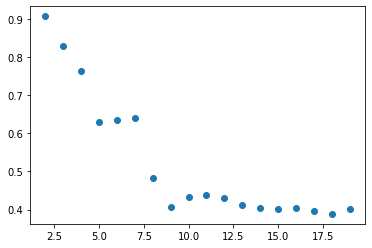

In [126]:
x = []
y = []
for i, (key, value) in enumerate(results.items()):
  x.append(key)
  y.append(value[3])

plt.scatter(x, y)